In [146]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ELU, ReLU, GaussianNoise
from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard
from keras.losses import MeanSquaredError

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 8

## Exploring dataset a bit

Load the dataset

In [2]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

```
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's
```

In [3]:
X = boston.data
Y = boston.target
print(X.shape, Y.shape)

(506, 13) (506,)


Histogram of target values

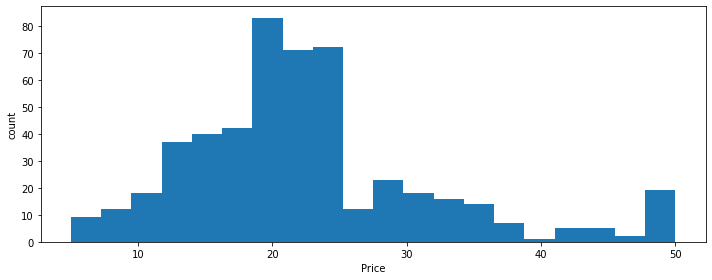

In [4]:
rcParams['figure.figsize'] = 10, 4
plt.hist(Y, bins = 20)
plt.xlabel('Price')
plt.ylabel('count')
plt.tight_layout()

First two Principal Components plot

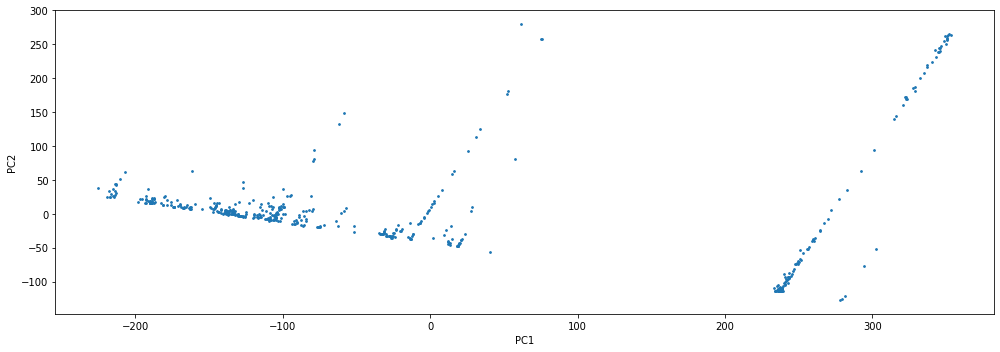

In [5]:
plt.figure(figsize=(14, 5))
pc_data = PCA().fit_transform(X)
plt.scatter(pc_data[:,0], pc_data[:,1], s = 3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

First Principal Component and target

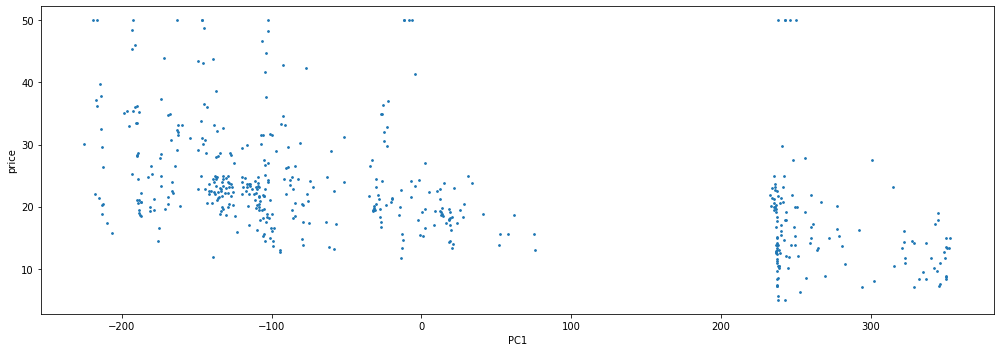

In [6]:
plt.figure(figsize=(14, 5))
pc_data = PCA().fit_transform(X)
plt.scatter(pc_data[:,0], Y, s = 3)
plt.xlabel('PC1')
plt.ylabel('price')
plt.tight_layout()
plt.show()

## Scaling and Train, Test, Valid split

In [7]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Y = Y[:,np.newaxis]
scaler.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [95]:
x_train, x_test,  y_train, y_test  = train_test_split(Xs, Y, test_size = 0.5)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.5)
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (126, 13), (126, 1)
Valid = (127, 13), (127, 1)
Test  = (253, 13), (253, 1)


## Simple Neural Network

In [96]:
model = Sequential(name="Regressor NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(ReLU())
model.add(Dense(Y.shape[1], name = 'output'))
model.add(ReLU())

model.summary()

Model: "Regressor NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
re_lu_22 (ReLU)              (None, 10)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 11        
_________________________________________________________________
re_lu_23 (ReLU)              (None, 1)                 0         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics = ['mae'])

In [98]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 50,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 126 samples, validate on 127 samples
Epoch 1/50
 - 0s - loss: 536.0949 - mae: 21.3858 - val_loss: 520.5082 - val_mae: 20.6680
Epoch 2/50
 - 0s - loss: 488.2119 - mae: 20.2299 - val_loss: 444.4748 - val_mae: 18.6455
Epoch 3/50
 - 0s - loss: 402.2823 - mae: 18.0063 - val_loss: 330.3749 - val_mae: 15.4777
Epoch 4/50
 - 0s - loss: 278.3054 - mae: 14.4466 - val_loss: 208.6206 - val_mae: 11.5685
Epoch 5/50
 - 0s - loss: 159.0771 - mae: 10.2089 - val_loss: 144.1175 - val_mae: 9.6454
Epoch 6/50
 - 0s - loss: 108.3239 - mae: 7.9995 - val_loss: 111.5626 - val_mae: 8.5937
Epoch 7/50
 - 0s - loss: 83.0926 - mae: 7.0934 - val_loss: 83.7746 - val_mae: 7.4770
Epoch 8/50
 - 0s - loss: 63.7483 - mae: 6.2778 - val_loss: 62.5867 - val_mae: 6.4504
Epoch 9/50
 - 0s - loss: 48.6973 - mae: 5.5324 - val_loss: 46.8320 - val_mae: 5.5454
Epoch 10/50
 - 0s - loss: 37.5216 - mae: 4.8718 - val_loss: 35.0077 - val_mae: 4.7666
Epoch 11/50
 - 0s - loss: 29.0041 - mae: 4.2764 - val_loss: 27.8926 - val_mae: 4.1

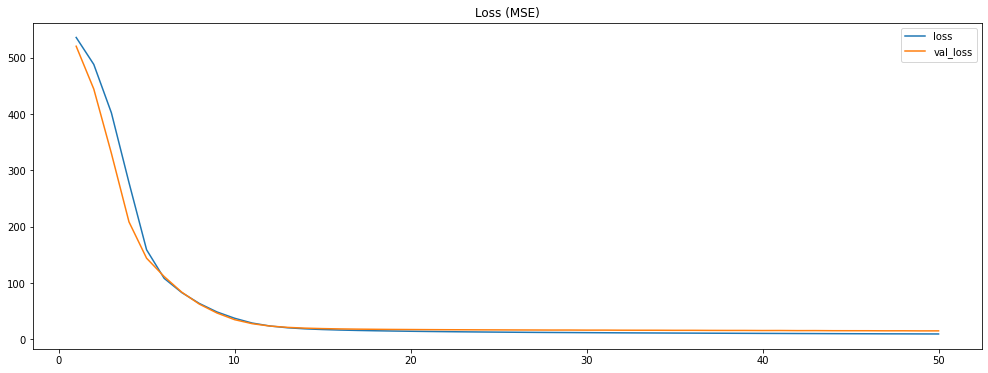

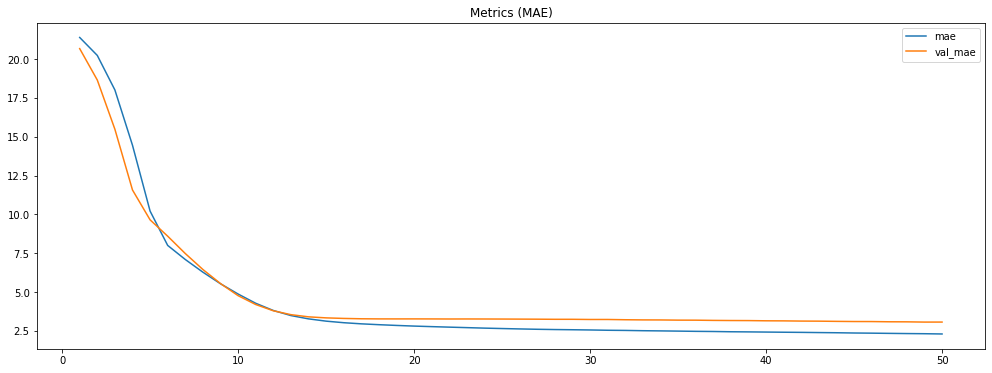

In [99]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (MSE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['mae'], label = 'mae')
plt.plot(xepochs, log.history['val_mae'], label = 'val_mae')
plt.title('Metrics (MAE)')
plt.legend()
plt.show()

In [100]:
print(f'MAE:\t\
{mean_absolute_error(model.predict(x_train), y_train):3.2f}\t\
{mean_absolute_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_absolute_error(model.predict(x_test), y_test):.2f}')

print(f'MSE:\t\
{mean_squared_error(model.predict(x_train), y_train):3.2f}\t\
{mean_squared_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_squared_error(model.predict(x_test), y_test):.2f}')

print(f'R2:\t\
{r2_score(model.predict(x_train), y_train):3.2f}\t\
{r2_score(model.predict(x_valid), y_valid):.2f}\t\
{r2_score(model.predict(x_test), y_test):.2f}')

MAE:	2.29	3.07	3.32
MSE:	9.54	15.15	23.22
R2:	0.85	0.77	0.66


## Increase complexity

In [162]:
model = Sequential(name="Regressor NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Y.shape[1], name = 'output'))
model.add(ReLU())

model.summary()

Model: "Regressor NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 10)                0         
_________________________________________________________________
gaussian_noise_5 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 10)               

In [163]:
model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics = ['mae'])

In [164]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 500,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 126 samples, validate on 127 samples
Epoch 1/500
 - 0s - loss: 523.5468 - mae: 21.1724 - val_loss: 493.2287 - val_mae: 20.5069
Epoch 2/500
 - 0s - loss: 452.4282 - mae: 19.4661 - val_loss: 321.7332 - val_mae: 16.3479
Epoch 3/500
 - 0s - loss: 328.3347 - mae: 16.2004 - val_loss: 183.0339 - val_mae: 12.2149
Epoch 4/500
 - 0s - loss: 296.8648 - mae: 14.5644 - val_loss: 380.9556 - val_mae: 17.2684
Epoch 5/500
 - 0s - loss: 348.7565 - mae: 16.6403 - val_loss: 194.0742 - val_mae: 12.0444
Epoch 6/500
 - 0s - loss: 201.4554 - mae: 11.8954 - val_loss: 55.8912 - val_mae: 5.7591
Epoch 7/500
 - 0s - loss: 256.7790 - mae: 12.1386 - val_loss: 302.9923 - val_mae: 15.2207
Epoch 8/500
 - 0s - loss: 282.8454 - mae: 14.7652 - val_loss: 157.9154 - val_mae: 10.4391
Epoch 9/500
 - 0s - loss: 200.9056 - mae: 11.0078 - val_loss: 84.1730 - val_mae: 7.4738
Epoch 10/500
 - 0s - loss: 170.8739 - mae: 10.3754 - val_loss: 131.0266 - val_mae: 9.2169
Epoch 11/500
 - 0s - loss: 145.7693 - mae: 9.3888 - val_lo

Epoch 95/500
 - 0s - loss: 56.3292 - mae: 5.5519 - val_loss: 21.2963 - val_mae: 3.0950
Epoch 96/500
 - 0s - loss: 55.1125 - mae: 5.6087 - val_loss: 22.1436 - val_mae: 3.1776
Epoch 97/500
 - 0s - loss: 57.8547 - mae: 5.4765 - val_loss: 23.4897 - val_mae: 3.2380
Epoch 98/500
 - 0s - loss: 44.9805 - mae: 5.2655 - val_loss: 21.7431 - val_mae: 3.1386
Epoch 99/500
 - 0s - loss: 52.3774 - mae: 5.2312 - val_loss: 29.0023 - val_mae: 3.7830
Epoch 100/500
 - 0s - loss: 47.3503 - mae: 5.2252 - val_loss: 33.0443 - val_mae: 4.0695
Epoch 101/500
 - 0s - loss: 39.9796 - mae: 4.5622 - val_loss: 23.5483 - val_mae: 3.2660
Epoch 102/500
 - 0s - loss: 51.3635 - mae: 5.6001 - val_loss: 23.0562 - val_mae: 3.2677
Epoch 103/500
 - 0s - loss: 44.1553 - mae: 5.1044 - val_loss: 27.7684 - val_mae: 3.7902
Epoch 104/500
 - 0s - loss: 49.8286 - mae: 5.2971 - val_loss: 19.8707 - val_mae: 3.0652
Epoch 105/500
 - 0s - loss: 49.3139 - mae: 5.4320 - val_loss: 36.4961 - val_mae: 4.3449
Epoch 106/500
 - 0s - loss: 59.1221 -

 - 0s - loss: 36.6996 - mae: 4.4579 - val_loss: 19.1286 - val_mae: 2.8963
Epoch 189/500
 - 0s - loss: 35.5841 - mae: 4.6002 - val_loss: 21.1761 - val_mae: 3.0948
Epoch 190/500
 - 0s - loss: 37.4165 - mae: 4.4438 - val_loss: 22.1018 - val_mae: 3.2411
Epoch 191/500
 - 0s - loss: 52.8793 - mae: 5.3014 - val_loss: 18.1014 - val_mae: 2.8924
Epoch 192/500
 - 0s - loss: 57.8618 - mae: 5.2017 - val_loss: 23.6861 - val_mae: 3.2914
Epoch 193/500
 - 0s - loss: 36.0199 - mae: 4.5077 - val_loss: 19.7371 - val_mae: 3.0239
Epoch 194/500
 - 0s - loss: 50.6833 - mae: 5.1764 - val_loss: 17.8166 - val_mae: 2.8493
Epoch 195/500
 - 0s - loss: 50.0078 - mae: 5.0087 - val_loss: 20.0869 - val_mae: 3.0660
Epoch 196/500
 - 0s - loss: 44.6020 - mae: 4.9906 - val_loss: 25.9247 - val_mae: 3.5460
Epoch 197/500
 - 0s - loss: 35.4095 - mae: 4.2829 - val_loss: 16.0537 - val_mae: 2.7200
Epoch 198/500
 - 0s - loss: 50.3909 - mae: 5.3319 - val_loss: 17.6976 - val_mae: 2.8497
Epoch 199/500
 - 0s - loss: 58.5943 - mae: 5.5

Epoch 282/500
 - 0s - loss: 37.9336 - mae: 4.3324 - val_loss: 20.1490 - val_mae: 3.0061
Epoch 283/500
 - 0s - loss: 36.6760 - mae: 4.4437 - val_loss: 23.4679 - val_mae: 3.3030
Epoch 284/500
 - 0s - loss: 40.9943 - mae: 4.6477 - val_loss: 17.3371 - val_mae: 2.7707
Epoch 285/500
 - 0s - loss: 37.6956 - mae: 4.2376 - val_loss: 18.1916 - val_mae: 2.8427
Epoch 286/500
 - 0s - loss: 46.8567 - mae: 4.8409 - val_loss: 19.3045 - val_mae: 2.9726
Epoch 287/500
 - 0s - loss: 28.5727 - mae: 3.9814 - val_loss: 16.0828 - val_mae: 2.6919
Epoch 288/500
 - 0s - loss: 35.8184 - mae: 4.0402 - val_loss: 14.4911 - val_mae: 2.6206
Epoch 289/500
 - 0s - loss: 44.0171 - mae: 4.9511 - val_loss: 21.5766 - val_mae: 3.1989
Epoch 290/500
 - 0s - loss: 43.5533 - mae: 4.6081 - val_loss: 28.7945 - val_mae: 3.6900
Epoch 291/500
 - 0s - loss: 40.8088 - mae: 4.3570 - val_loss: 19.5520 - val_mae: 2.9365
Epoch 292/500
 - 0s - loss: 37.3792 - mae: 4.6478 - val_loss: 17.2054 - val_mae: 2.7618
Epoch 293/500
 - 0s - loss: 37.3

 - 0s - loss: 38.5446 - mae: 4.6018 - val_loss: 22.6368 - val_mae: 3.3416
Epoch 376/500
 - 0s - loss: 40.6543 - mae: 4.4021 - val_loss: 18.1379 - val_mae: 2.9260
Epoch 377/500
 - 0s - loss: 32.0350 - mae: 4.1612 - val_loss: 16.9936 - val_mae: 2.8448
Epoch 378/500
 - 0s - loss: 34.4007 - mae: 4.2633 - val_loss: 18.0184 - val_mae: 2.9105
Epoch 379/500
 - 0s - loss: 33.6709 - mae: 3.9881 - val_loss: 18.1818 - val_mae: 2.9206
Epoch 380/500
 - 0s - loss: 40.3080 - mae: 4.2655 - val_loss: 18.8016 - val_mae: 2.9704
Epoch 381/500
 - 0s - loss: 34.8724 - mae: 4.1328 - val_loss: 18.8350 - val_mae: 2.9843
Epoch 382/500
 - 0s - loss: 33.2037 - mae: 4.1550 - val_loss: 19.2405 - val_mae: 3.0184
Epoch 383/500
 - 0s - loss: 44.0995 - mae: 4.6948 - val_loss: 30.8213 - val_mae: 3.8941
Epoch 384/500
 - 0s - loss: 38.5686 - mae: 4.4607 - val_loss: 20.5473 - val_mae: 3.0982
Epoch 385/500
 - 0s - loss: 32.0072 - mae: 3.9983 - val_loss: 18.0996 - val_mae: 2.8745
Epoch 386/500
 - 0s - loss: 39.3743 - mae: 4.3

Epoch 469/500
 - 0s - loss: 35.7567 - mae: 4.2090 - val_loss: 17.4688 - val_mae: 2.8706
Epoch 470/500
 - 0s - loss: 40.1261 - mae: 4.5351 - val_loss: 21.8039 - val_mae: 3.2383
Epoch 471/500
 - 0s - loss: 30.3418 - mae: 3.9183 - val_loss: 18.5820 - val_mae: 2.9661
Epoch 472/500
 - 0s - loss: 35.7159 - mae: 4.1269 - val_loss: 15.0789 - val_mae: 2.7431
Epoch 473/500
 - 0s - loss: 40.9852 - mae: 4.4187 - val_loss: 25.3859 - val_mae: 3.5210
Epoch 474/500
 - 0s - loss: 29.3821 - mae: 3.6778 - val_loss: 18.2331 - val_mae: 2.9279
Epoch 475/500
 - 0s - loss: 32.5709 - mae: 4.1221 - val_loss: 20.0718 - val_mae: 3.0834
Epoch 476/500
 - 0s - loss: 28.5179 - mae: 3.6152 - val_loss: 16.9034 - val_mae: 2.8153
Epoch 477/500
 - 0s - loss: 24.6311 - mae: 3.4075 - val_loss: 17.8802 - val_mae: 2.8921
Epoch 478/500
 - 0s - loss: 41.2688 - mae: 4.2979 - val_loss: 16.4151 - val_mae: 2.7748
Epoch 479/500
 - 0s - loss: 26.4111 - mae: 3.7240 - val_loss: 18.8738 - val_mae: 2.9889
Epoch 480/500
 - 0s - loss: 35.5

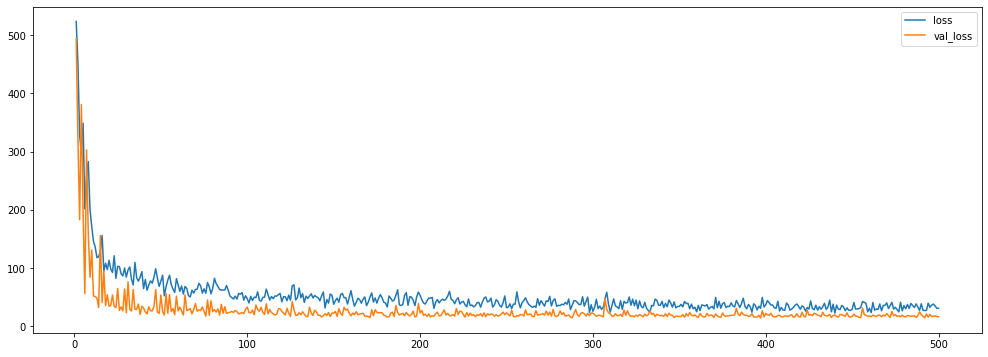

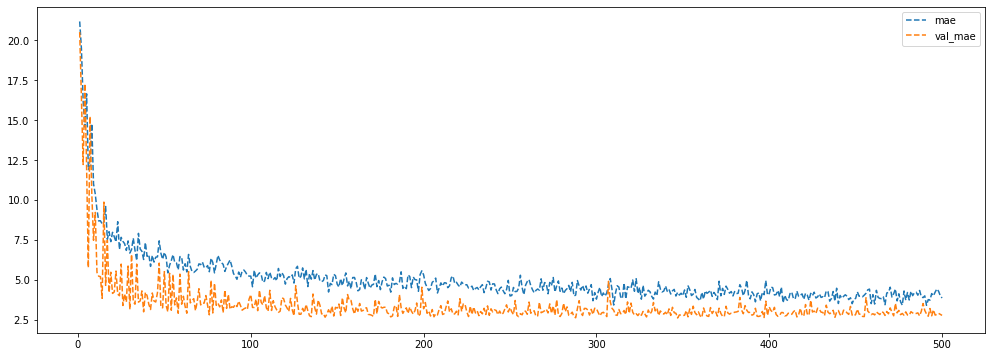

In [165]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['mae'], '--', label = 'mae')
plt.plot(xepochs, log.history['val_mae'], '--', label = 'val_mae')
plt.legend()
plt.show()

In [166]:
print(f'MAE:\t\
{mean_absolute_error(model.predict(x_train), y_train):3.2f}\t\
{mean_absolute_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_absolute_error(model.predict(x_test), y_test):.2f}')

print(f'MSE:\t\
{mean_squared_error(model.predict(x_train), y_train):3.2f}\t\
{mean_squared_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_squared_error(model.predict(x_test), y_test):.2f}')

print(f'R2:\t\
{r2_score(model.predict(x_train), y_train):3.2f}\t\
{r2_score(model.predict(x_valid), y_valid):.2f}\t\
{r2_score(model.predict(x_test), y_test):.2f}')

MAE:	2.52	2.77	3.15
MSE:	14.11	16.08	23.94
R2:	0.70	0.67	0.51


## Early stop

In [194]:
model = Sequential(name="Regressor NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(ELU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(ELU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Y.shape[1], name = 'output'))
model.add(ReLU())

model.summary()

Model: "Regressor NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
elu_11 (ELU)                 (None, 10)                0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 10)                0         
_________________________________________________________________
gaussian_noise_17 (GaussianN (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
elu_12 (ELU)                 (None, 10)                0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 10)               

In [195]:
model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics = ['mae'])
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 20, verbose = 1, restore_best_weights = True)

In [196]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 500,
    verbose = 2,
    validation_data=(x_valid, y_valid),
    callbacks = [ es ]
)

Train on 126 samples, validate on 127 samples
Epoch 1/500
 - 0s - loss: 530.8511 - mae: 21.2480 - val_loss: 520.4998 - val_mae: 20.9306
Epoch 2/500
 - 0s - loss: 491.1321 - mae: 20.4258 - val_loss: 395.9285 - val_mae: 18.2616
Epoch 3/500
 - 0s - loss: 388.1477 - mae: 17.7190 - val_loss: 228.4380 - val_mae: 13.4093
Epoch 4/500
 - 0s - loss: 381.3989 - mae: 16.3675 - val_loss: 422.9955 - val_mae: 18.5582
Epoch 5/500
 - 0s - loss: 426.9350 - mae: 18.6559 - val_loss: 294.7405 - val_mae: 15.4938
Epoch 6/500
 - 0s - loss: 288.2898 - mae: 15.1826 - val_loss: 96.7014 - val_mae: 8.6720
Epoch 7/500
 - 0s - loss: 185.1397 - mae: 11.4292 - val_loss: 77.0056 - val_mae: 7.3399
Epoch 8/500
 - 0s - loss: 144.6759 - mae: 10.0565 - val_loss: 41.0505 - val_mae: 4.9902
Epoch 9/500
 - 0s - loss: 193.5615 - mae: 10.9542 - val_loss: 159.3864 - val_mae: 10.2683
Epoch 10/500
 - 0s - loss: 214.2565 - mae: 11.8905 - val_loss: 83.2657 - val_mae: 7.1608
Epoch 11/500
 - 0s - loss: 167.5281 - mae: 10.1938 - val_loss

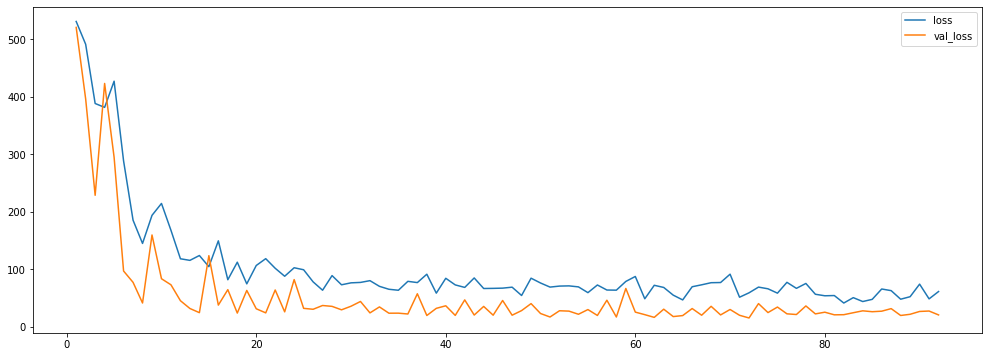

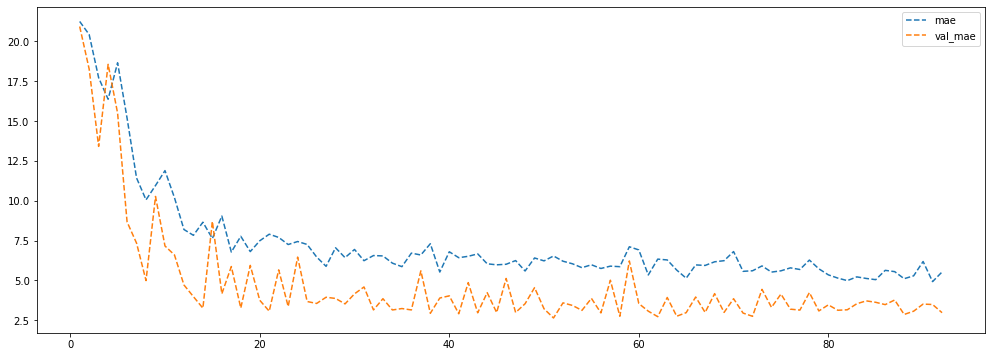

In [197]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['mae'], '--', label = 'mae')
plt.plot(xepochs, log.history['val_mae'], '--', label = 'val_mae')
plt.legend()
plt.show()

In [198]:
print(f'MAE:\t\
{mean_absolute_error(model.predict(x_train), y_train):3.2f}\t\
{mean_absolute_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_absolute_error(model.predict(x_test), y_test):.2f}')

print(f'MSE:\t\
{mean_squared_error(model.predict(x_train), y_train):3.2f}\t\
{mean_squared_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_squared_error(model.predict(x_test), y_test):.2f}')

print(f'R2:\t\
{r2_score(model.predict(x_train), y_train):3.2f}\t\
{r2_score(model.predict(x_valid), y_valid):.2f}\t\
{r2_score(model.predict(x_test), y_test):.2f}')

MAE:	2.74	2.75	3.02
MSE:	16.11	15.01	23.87
R2:	0.74	0.78	0.61
